In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load in the dataset
df = pd.read_csv("ecommerce_churn_data.csv")

In [2]:
# Display basic information of the dataset
print(df.shape) # number of rows and columns

(10205, 16)


In [3]:
print(df.columns.tolist()) # View Columns

['CustomerID', 'Age', 'Gender', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'HoursSpentOnApp', 'NumberOfDevicesRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']


In [4]:
print(df.head()) # preview first few rows

   CustomerID  Age  Gender  Tenure PreferredLoginDevice  CityTier  \
0       56346   29    Male     5.0              Desktop         1   
1       56347   45  Female    36.0               Mobile         3   
2       56348   22    Male     2.0               Mobile         1   
3       56349   39  Female    24.0              Desktop         2   
4       56350   31    Male    12.0               Mobile         1   

   WarehouseToHome  HoursSpentOnApp  NumberOfDevicesRegistered  \
0              7.2              2.5                          2   
1             20.1              4.8                          4   
2              5.0              1.8                          1   
3             15.3              3.9                          3   
4              8.8              3.0                          2   

   SatisfactionScore  NumberOfAddress  Complain  OrderCount  \
0                  3                1         1           8   
1                  5                3         0          50   

In [5]:
df.describe()

,CustomerID,Age,Tenure,CityTier,WarehouseToHome,HoursSpentOnApp,NumberOfDevicesRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
count,10205.000000,10205.000000,10204.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000
mean,29677.581872,35.193043,19.685515,2.007349,9.887428,3.343626,2.833807,3.504459,1.861832,0.216267,21.453895,8.891720,157.953214,0.238707
std,25617.824693,9.625432,14.475853,0.826741,5.481747,1.133353,0.921249,1.162892,0.920454,0.411718,18.955878,8.283807,107.627670,0.426314
min,307.000000,18.000000,1.000000,1.000000,0.500000,0.800000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5097.000000,28.000000,8.000000,1.000000,6.000000,2.500000,2.000000,3.000000,1.000000,0.000000,9.000000,3.000000,75.000000,0.000000
50%,9711.000000,33.000000,16.000000,2.000000,9.000000,3.400000,3.000000,4.000000,2.000000,0.000000,18.000000,6.000000,140.000000,0.000000
75%,56429.000000,42.000000,28.000000,3.000000,13.000000,4.100000,3.000000,4.000000,2.000000,0.000000,28.000000,12.000000,220.000000,0.000000
max,56760.000000,65.000000,85.000000,3.000000,35.000000,8.500000,5.000000,5.000000,5.000000,1.000000,250.000000,60.000000,1120.000000,1.000000


In [6]:
# Check for duplicated rows
df.duplicated().sum()

0

In [7]:
# Check for missing values
df.isnull().sum()

CustomerID                   0
Age                          0
Gender                       0
Tenure                       1
PreferredLoginDevice         0
CityTier                     0
WarehouseToHome              0
HoursSpentOnApp              0
NumberOfDevicesRegistered    0
SatisfactionScore            0
NumberOfAddress              0
Complain                     0
OrderCount                   0
DaySinceLastOrder            0
CashbackAmount               0
Churn                        0
dtype: int64

In [17]:
# Check column data types
df.dtypes

CustomerID                     int64
Age                            int64
Gender                        object
Tenure                       float64
PreferredLoginDevice          object
CityTier                       int64
WarehouseToHome              float64
HoursSpentOnApp              float64
NumberOfDevicesRegistered      int64
SatisfactionScore              int64
NumberOfAddress                int64
Complain                       int64
OrderCount                     int64
DaySinceLastOrder              int64
CashbackAmount               float64
Churn                          int64
dtype: object

In [19]:
# Separate numeric & categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['CustomerID', 'Age', 'Tenure', 'CityTier', 'WarehouseToHome', 'HoursSpentOnApp', 'NumberOfDevicesRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']
Categorical Columns: ['Gender', 'PreferredLoginDevice']


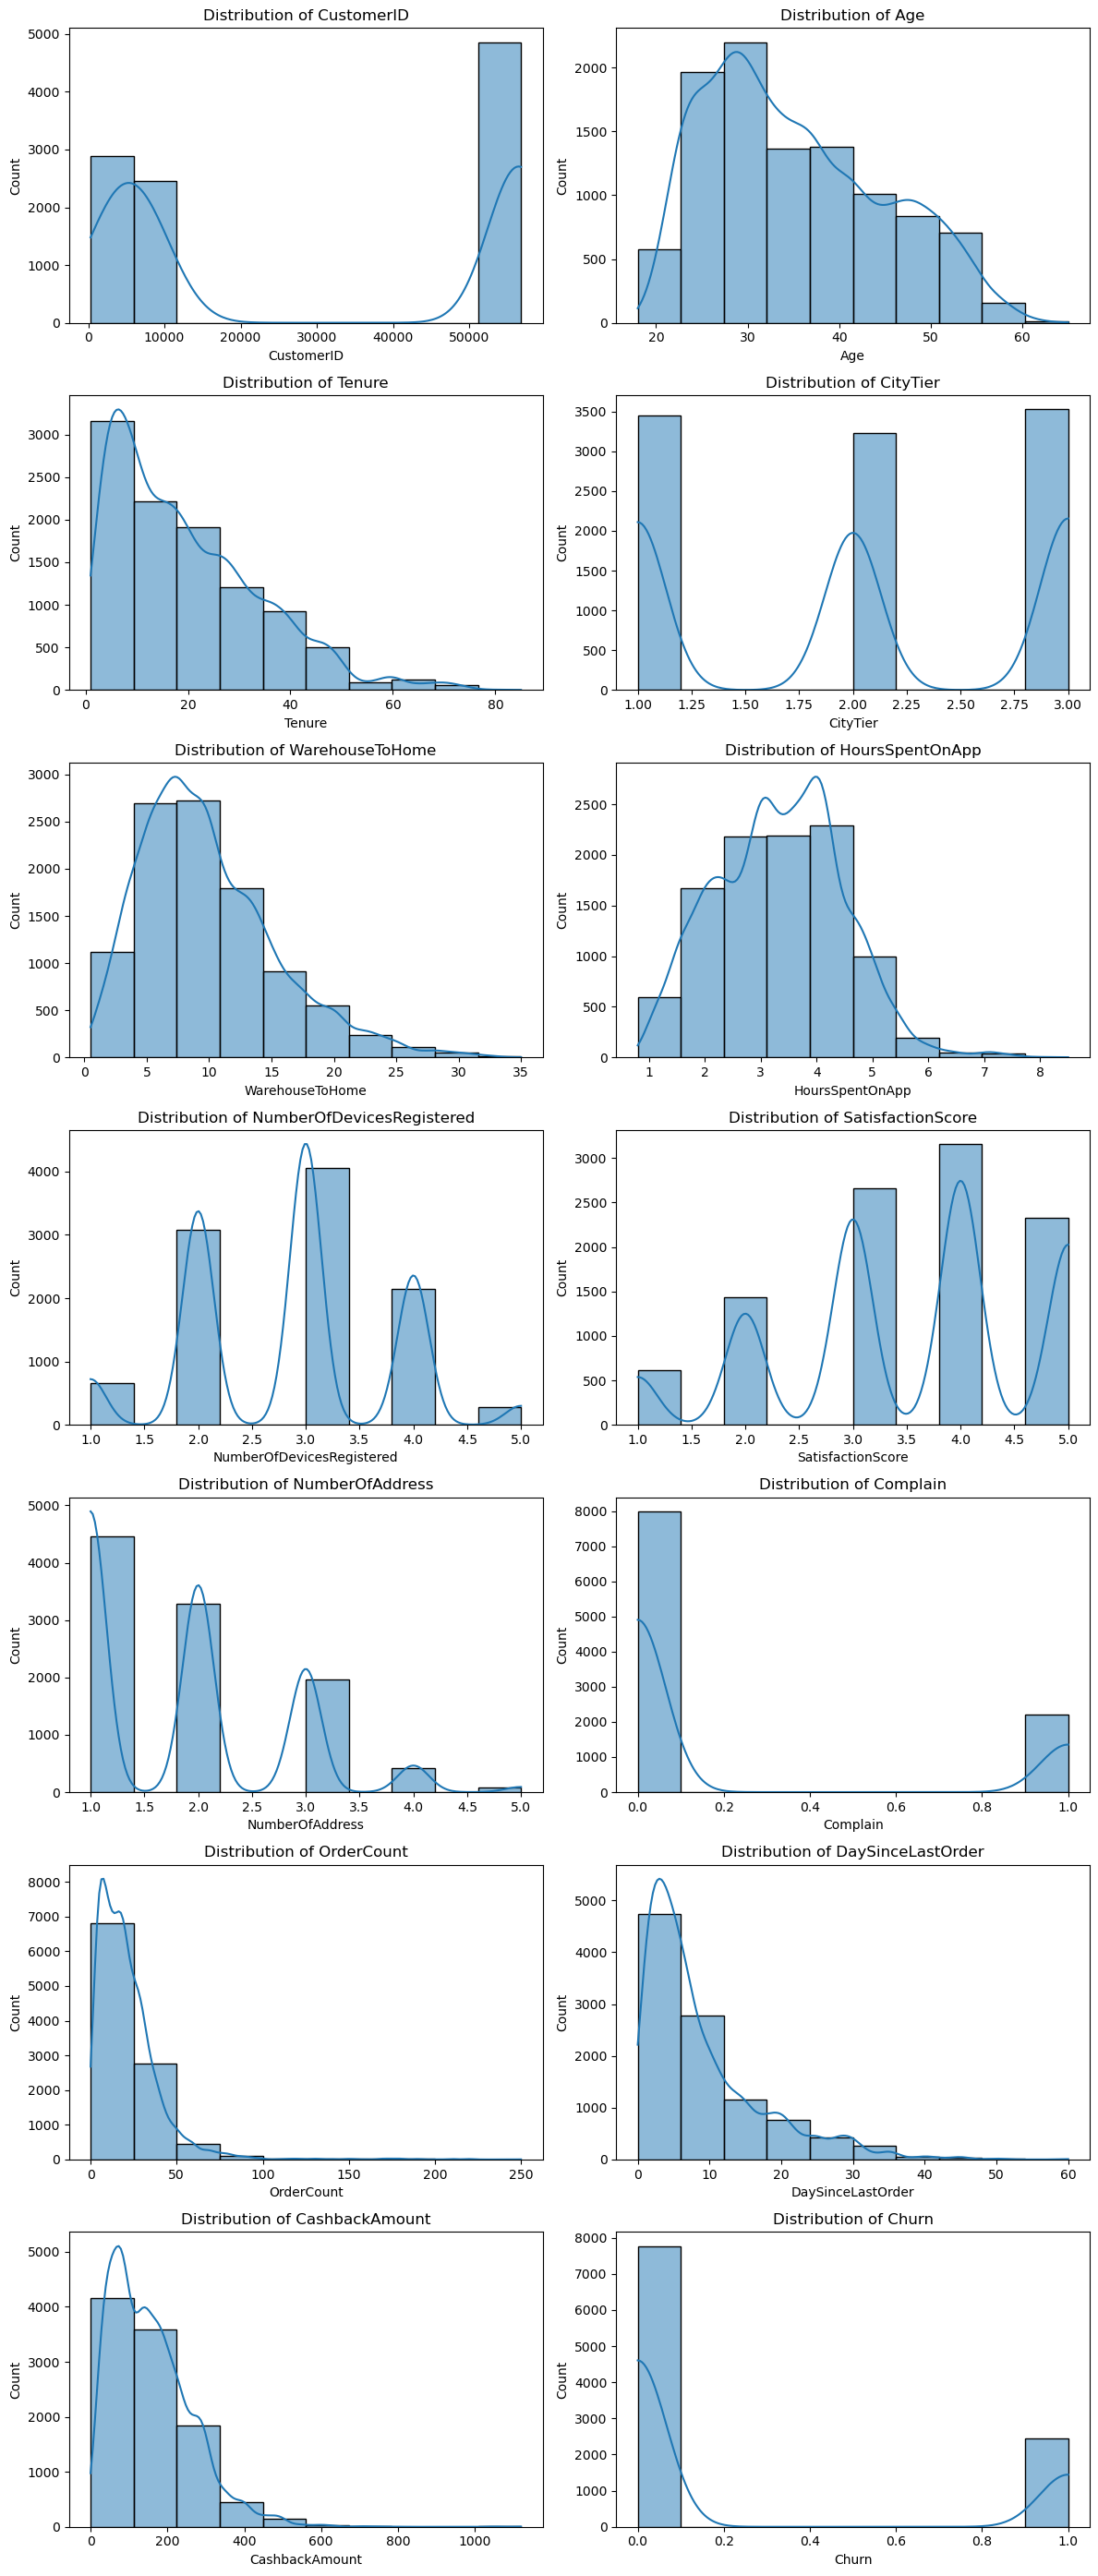

In [27]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

no_of_plots = 2
no_of_rows = (len(num_cols) + no_of_plots - 1) // no_of_plots

plt.figure(figsize=(12, 4 * no_of_rows))

for i, col in enumerate(num_cols):
    plt.subplot(no_of_rows, no_of_plots, i + 1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()


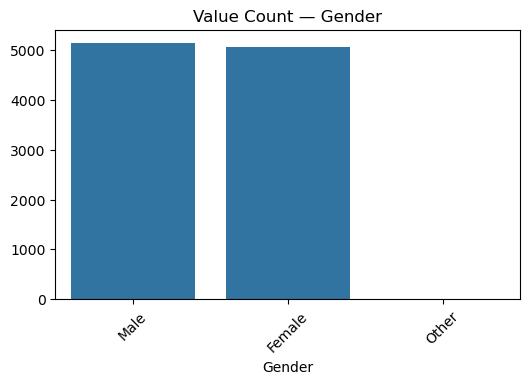

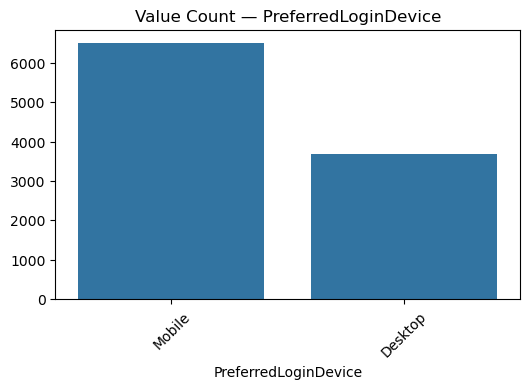

In [25]:
# Categorical value counts
for col in categorical_cols:
    plt.figure(figsize=(6,3.5))
    vc = df[col].value_counts().head(10)
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f"Value Count — {col}")
    plt.xticks(rotation=45)
    plt.show()

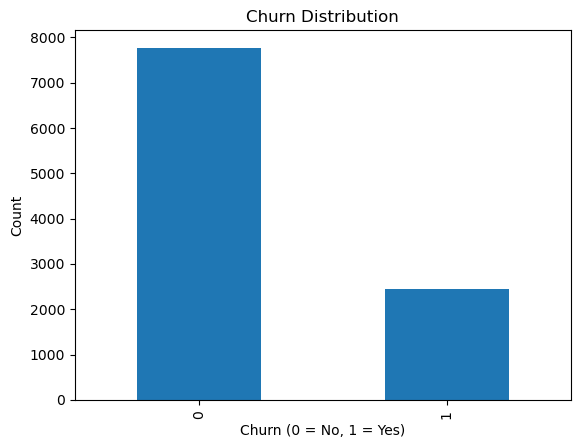

In [27]:
# Churn Distribution
plt.figure()
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Feature mean difference grouped by churn


Churn,0,1
CustomerID,30016.561020,28606.999589
Age,36.553167,30.860427
Tenure,22.080072,12.049672
CityTier,1.996009,2.043514
WarehouseToHome,9.509295,11.096059
HoursSpentOnApp,3.427716,3.076314
NumberOfDevicesRegistered,3.020597,2.238506
SatisfactionScore,3.969361,2.021346
NumberOfAddress,1.978759,1.489327
Complain,0.008496,0.878900


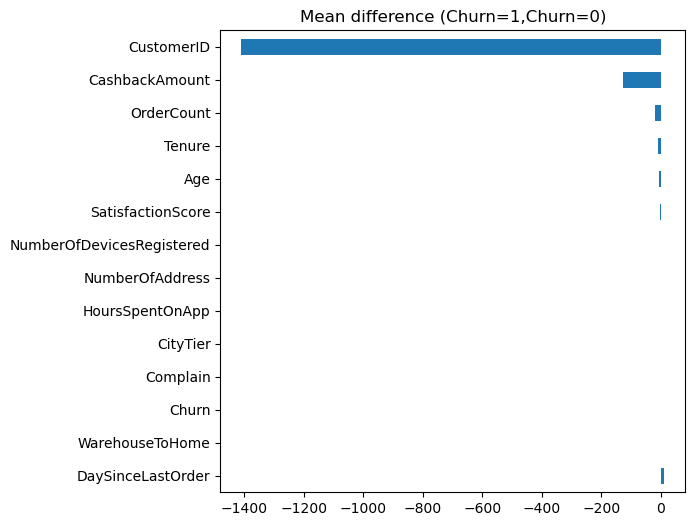

In [33]:
# Numeric variables grouped by churn
churn_mean_diff = df.groupby("Churn")[numeric_cols].mean().T
print("Feature mean difference grouped by churn")
display(churn_mean_diff)

(churn_mean_diff[1] - churn_mean_diff[0]).sort_values(ascending=False).plot.barh(figsize=(6,6))
plt.title("Mean difference (Churn=1,Churn=0)")
plt.show()

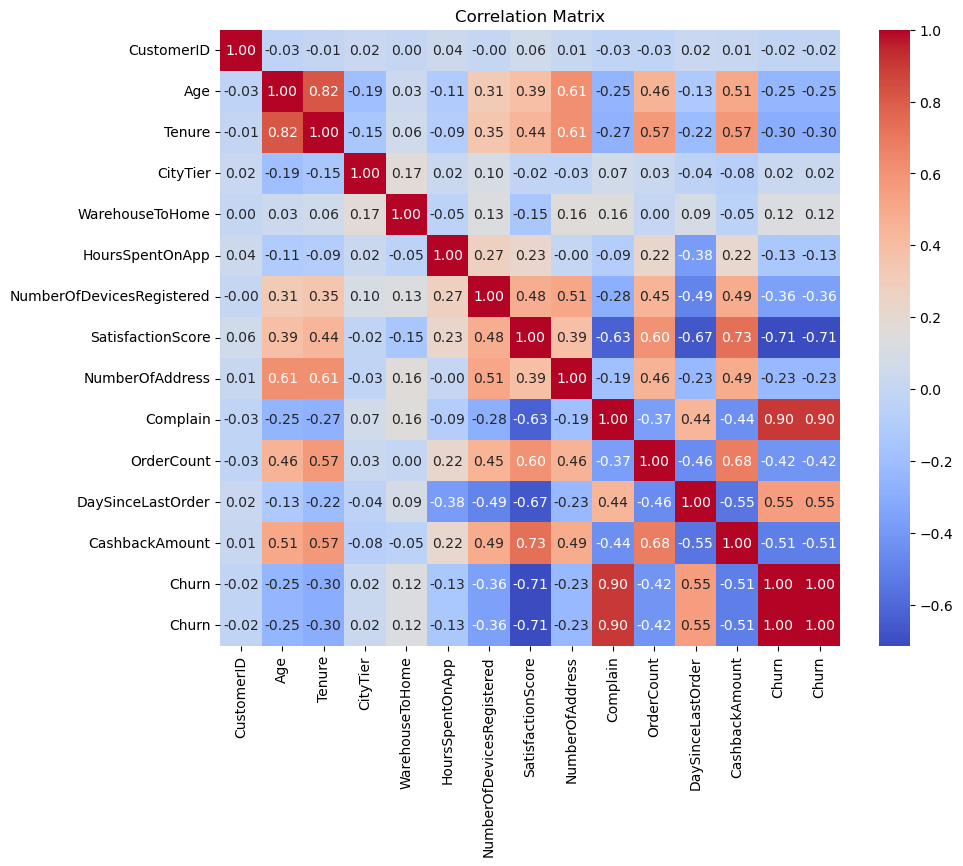

In [35]:
# Correlation matrix
corr = df[numeric_cols + ['Churn']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [45]:
# Categorical vs churn (proportions)
for col in categorical_cols:
    prop = pd.crosstab(df[col], df['Churn'], normalize="index")
    print(f"Churn proportion by: {col}")
    display(prop.head(10))

Churn proportion by: Gender


Churn,0,1
Gender,,
Female,0.758750,0.241250
Male,0.763848,0.236152
Other,0.500000,0.500000


Churn proportion by: PreferredLoginDevice


Churn,0,1
PreferredLoginDevice,,
Desktop,0.820027,0.179973
Mobile,0.727915,0.272085


In [63]:
df.nunique().sort_values(ascending=False)

CustomerID                   5751
CashbackAmount               1073
WarehouseToHome               244
OrderCount                    115
Tenure                         77
HoursSpentOnApp                71
Age                            47
DaySinceLastOrder              47
NumberOfDevicesRegistered       5
SatisfactionScore               5
NumberOfAddress                 5
Gender                          3
CityTier                        3
PreferredLoginDevice            2
Complain                        2
Churn                           2
dtype: int64